# 탐색적 데이터 분석

#### #01. 작업준비

1. 패키지 참조

In [22]:
import sys
sys.path.append('../')
import helper

import numpy as np
from pandas import read_excel,merge, DataFrame, get_dummies
from matplotlib import pyplot as plt
import seaborn as sb

2. 데이터 가져오기

In [2]:
origin = read_excel("분석용데이터.xlsx")

print(origin.shape)

print(origin.info())

origin.head()

(265937, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265937 entries, 0 to 265936
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   기준_년_코드    265937 non-null  int64  
 1   기준_분기_코드   265937 non-null  int64  
 2   Covid19    265928 non-null  float64
 3   상권_코드      265937 non-null  int64  
 4   분기당_매출_금액  265928 non-null  float64
 5   주중_매출_금액   265928 non-null  float64
 6   주말_매출_금액   265928 non-null  float64
 7   남성_매출_금액   265928 non-null  float64
 8   여성_매출_금액   265928 non-null  float64
 9   점포수        265928 non-null  float64
 10  일과시간_금액    265928 non-null  float64
 11  일과이후_금액    265928 non-null  float64
 12  청년금액       265928 non-null  float64
 13  중년금액       265928 non-null  float64
 14  장년금액       265928 non-null  float64
 15  상권_코드_명    265928 non-null  object 
 16  엑스좌표_값     265928 non-null  float64
 17  와이좌표_값     265928 non-null  float64
 18  시군구_코드     265928 non-null  float64
 19  행정동_코드    

,기준_년_코드,기준_분기_코드,Covid19,상권_코드,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,...,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,시군구명,시군구코드,도심,총_직장_인구_수,총_생활인구_수
0,2018,3,0.0,1000094,1.824475e+08,1.816677e+08,779766.0,81108758.0,83644304.0,5.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,3118,1272175.0
1,2018,3,0.0,1000094,4.561081e+06,3.428057e+06,1133024.0,0.0,4561081.0,2.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,3118,1272175.0
2,2018,3,0.0,1000094,8.629311e+07,7.820822e+07,8084889.0,38252844.0,48040265.0,1.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,3118,1272175.0
3,2018,3,0.0,1000094,9.394161e+07,6.050822e+07,33433384.0,45574085.0,36140265.0,1.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,3118,1272175.0
4,2018,3,0.0,1000094,1.692325e+09,1.354745e+09,337580548.0,489138378.0,195886445.0,1.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,3118,1272175.0


3. 명목형 변수에 대한 데이터 타입 변경

In [3]:
df = origin.astype({
    '기준_년_코드': 'category',
    '기준_분기_코드': 'category', 
    'Covid19': 'category', 
    '상권_코드': 'category', 
    '상권_코드_명': 'category', 
    '시군구_코드': 'category', 
    '행정동_코드': 'category', 
    '시군구명': 'category', 
    '시군구코드': 'category', 
    '도심': 'category'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265937 entries, 0 to 265936
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   기준_년_코드    265937 non-null  category
 1   기준_분기_코드   265937 non-null  category
 2   Covid19    265928 non-null  category
 3   상권_코드      265937 non-null  category
 4   분기당_매출_금액  265928 non-null  float64 
 5   주중_매출_금액   265928 non-null  float64 
 6   주말_매출_금액   265928 non-null  float64 
 7   남성_매출_금액   265928 non-null  float64 
 8   여성_매출_금액   265928 non-null  float64 
 9   점포수        265928 non-null  float64 
 10  일과시간_금액    265928 non-null  float64 
 11  일과이후_금액    265928 non-null  float64 
 12  청년금액       265928 non-null  float64 
 13  중년금액       265928 non-null  float64 
 14  장년금액       265928 non-null  float64 
 15  상권_코드_명    265928 non-null  category
 16  엑스좌표_값     265928 non-null  float64 
 17  와이좌표_값     265928 non-null  float64 
 18  시군구_코드     265928 non-null  category
 19  행정

#### #02. 명목형 변수에 대한 기초 통계량 확인

각 컬럼의 데이터 타입을 확인

In [9]:
df.dtypes

기준_년_코드      category
기준_분기_코드     category
Covid19      category
상권_코드        category
분기당_매출_금액     float64
주중_매출_금액      float64
주말_매출_금액      float64
남성_매출_금액      float64
여성_매출_금액      float64
점포수           float64
일과시간_금액       float64
일과이후_금액       float64
청년금액          float64
중년금액          float64
장년금액          float64
상권_코드_명      category
엑스좌표_값        float64
와이좌표_값        float64
시군구_코드       category
행정동_코드       category
시군구명         category
시군구코드        category
도심           category
총_직장_인구_수       int64
총_생활인구_수      float64
dtype: object

명목형 변수의 이름을 추출

In [10]:
cnames = []

for i, v in enumerate(df.dtypes):
    if v == 'category':
        cnames.append(df.columns[i])
        
cnames

['기준_년_코드',
 '기준_분기_코드',
 'Covid19',
 '상권_코드',
 '상권_코드_명',
 '시군구_코드',
 '행정동_코드',
 '시군구명',
 '시군구코드',
 '도심']

명목형 변수로만 구성된 새로운 데이터프레임을 생성

In [11]:
cdf = df[cnames]
cdf

,기준_년_코드,기준_분기_코드,Covid19,상권_코드,상권_코드_명,시군구_코드,행정동_코드,시군구명,시군구코드,도심
0,2018,3,0.0,1000094,마장로39길,11200.0,11200540.0,성동구,11200.0,0.0
1,2018,3,0.0,1000094,마장로39길,11200.0,11200540.0,성동구,11200.0,0.0
2,2018,3,0.0,1000094,마장로39길,11200.0,11200540.0,성동구,11200.0,0.0
3,2018,3,0.0,1000094,마장로39길,11200.0,11200540.0,성동구,11200.0,0.0
4,2018,3,0.0,1000094,마장로39길,11200.0,11200540.0,성동구,11200.0,0.0
...,...,...,...,...,...,...,...,...,...,...
265932,2020,3,NaN,1000805,NaN,NaN,NaN,NaN,NaN,NaN
265933,2020,2,NaN,1000805,NaN,NaN,NaN,NaN,NaN,NaN
265934,2020,1,NaN,1000805,NaN,NaN,NaN,NaN,NaN,NaN
265935,2021,2,NaN,1000805,NaN,NaN,NaN,NaN,NaN,NaN


확인이 필요한 컬럼에 대한 카운트 플롯

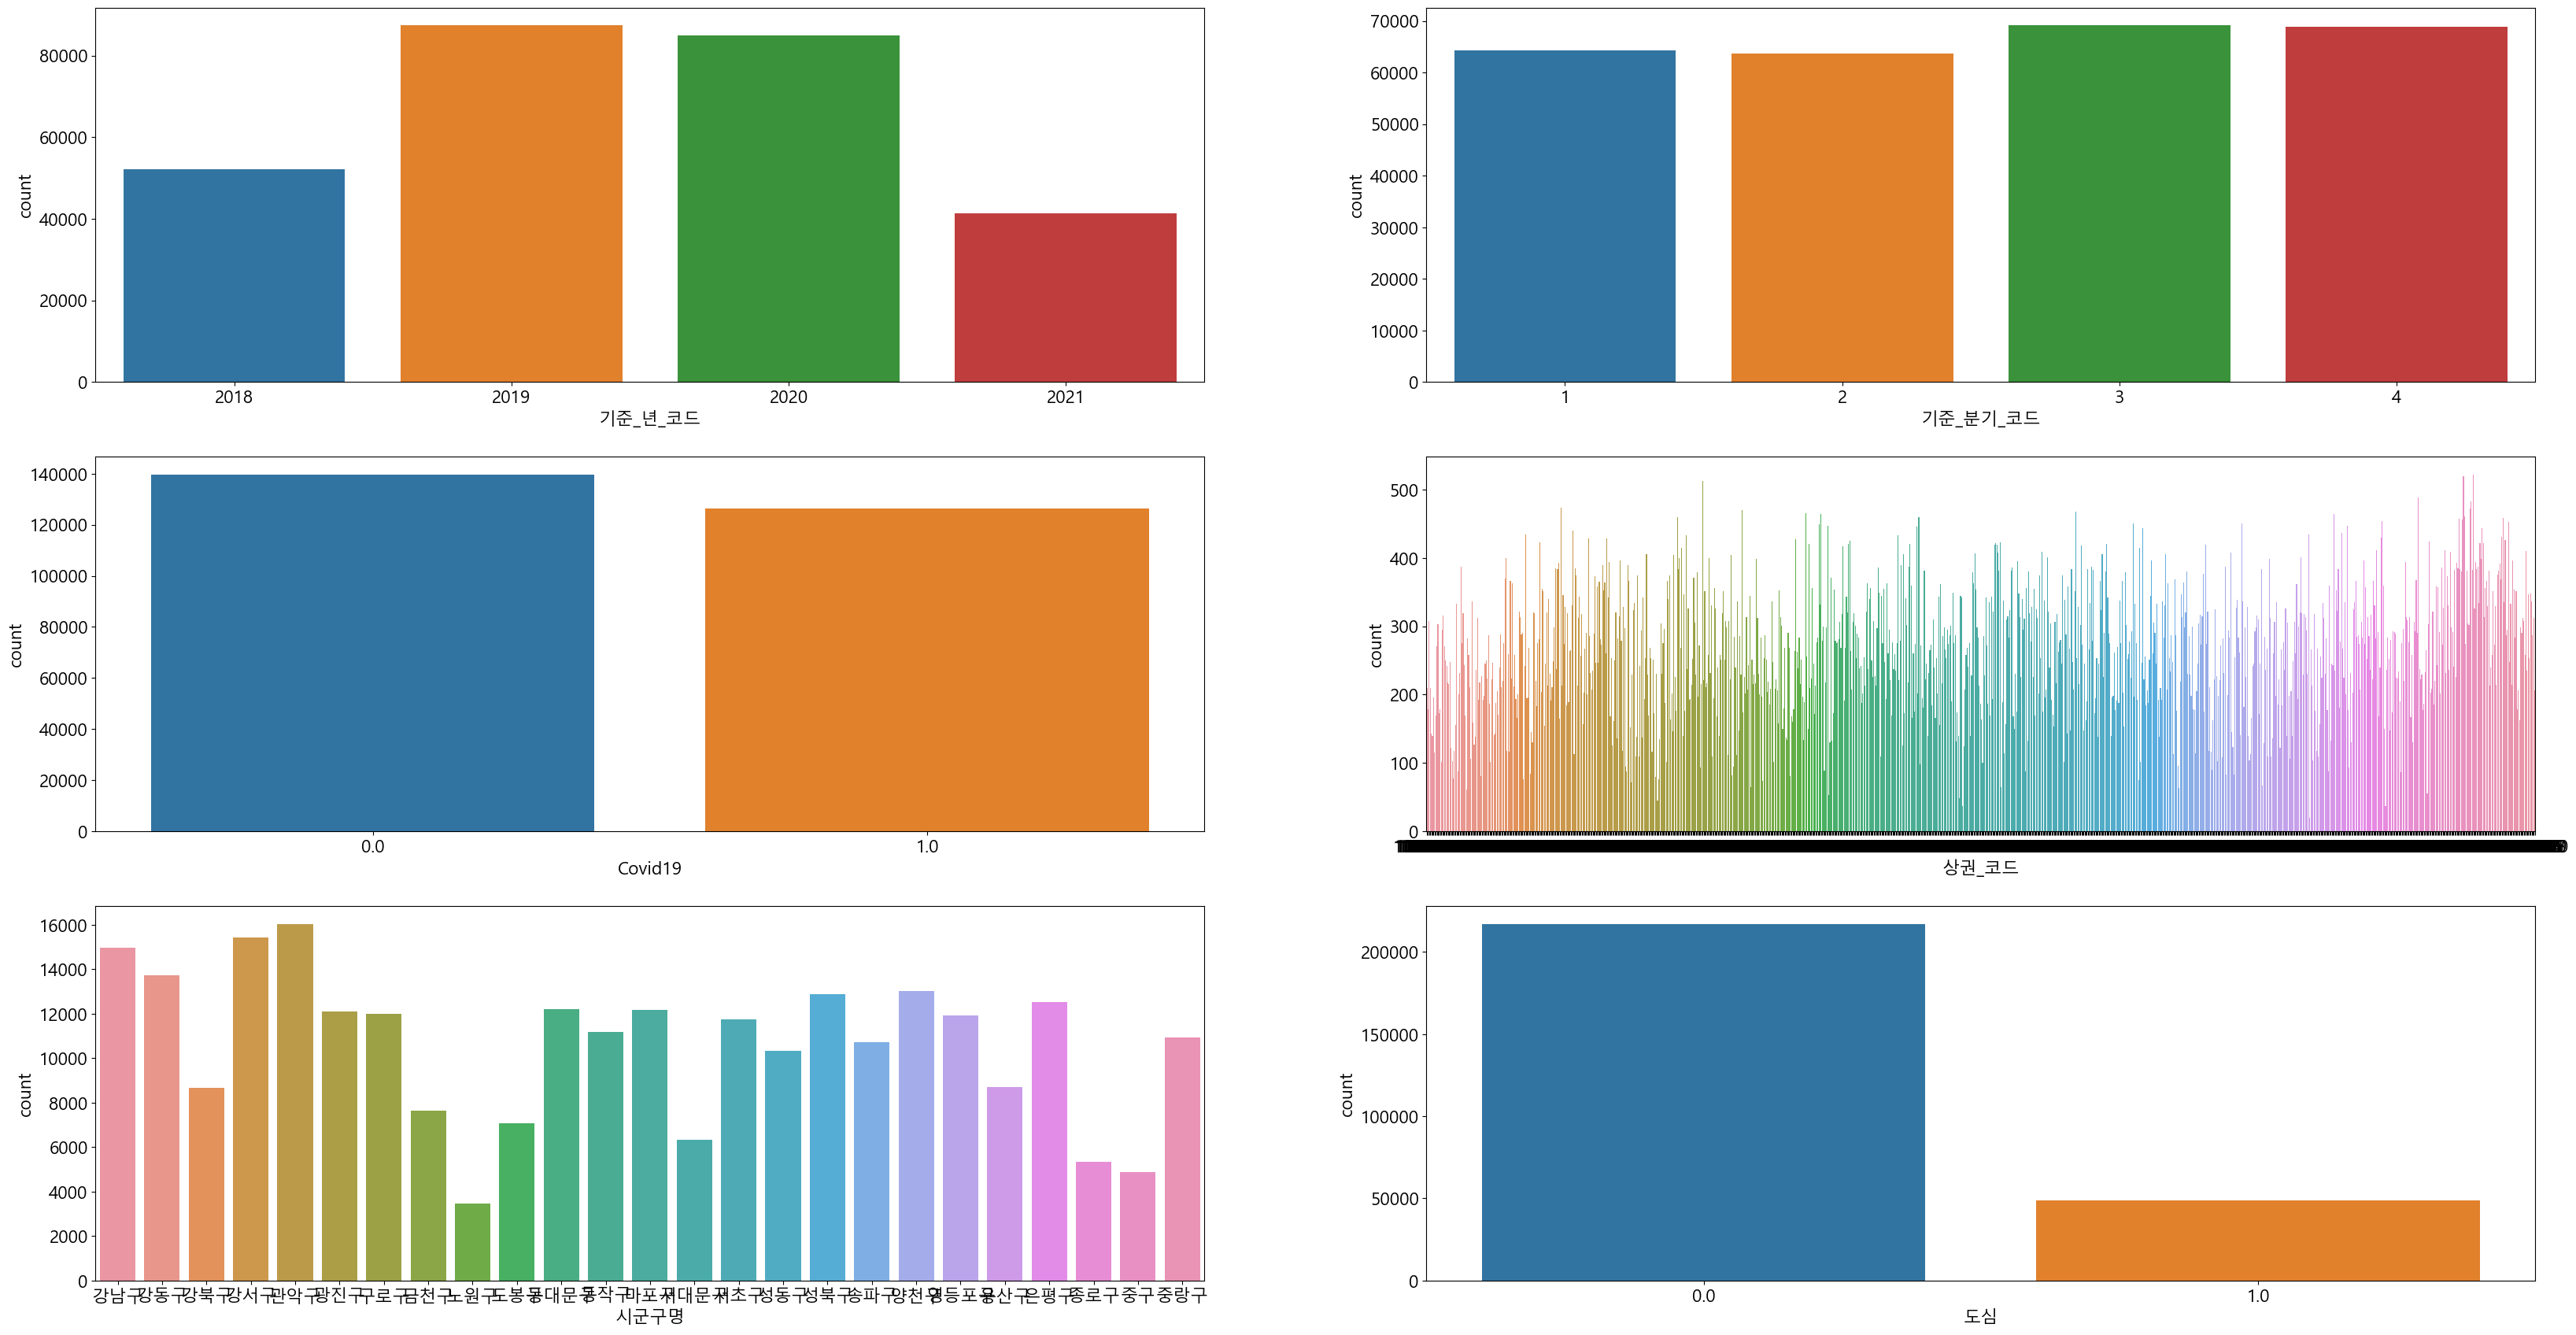

In [12]:
target = ['기준_년_코드','기준_분기_코드','Covid19','상권_코드','시군구명','도심']

rows = round(len(target) / 2)

fig, ax = plt.subplots(rows, 2, figsize=(40, 7*rows))

for i, v in enumerate(target):
    r = int(i / 2)
    c = i % 2
    sb.countplot(x=v, data=cdf, ax=ax[r][c])
    
plt.show()
plt.close()

#### #03. 연속형 변수에 대한 기초 통계량 확인

결측치 확인

In [13]:
df.isna().sum()

기준_년_코드          0
기준_분기_코드         0
Covid19          9
상권_코드            0
분기당_매출_금액        9
주중_매출_금액         9
주말_매출_금액         9
남성_매출_금액         9
여성_매출_금액         9
점포수              9
일과시간_금액          9
일과이후_금액          9
청년금액             9
중년금액             9
장년금액             9
상권_코드_명          9
엑스좌표_값           9
와이좌표_값           9
시군구_코드           9
행정동_코드           9
시군구명             9
시군구코드            9
도심               9
총_직장_인구_수        0
총_생활인구_수     43805
dtype: int64

결측치가 있는 데이터의 내용을 확인

In [14]:
null_df = df.query('(총_직장_인구_수.isnull()) or (총_생활인구_수.isnull())')
null_df

,기준_년_코드,기준_분기_코드,Covid19,상권_코드,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,...,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,시군구명,시군구코드,도심,총_직장_인구_수,총_생활인구_수
55,2019,1,0.0,1000094,31215652.0,31215652.0,0.0,11999503.0,19216149.0,1.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,3070,NaN
56,2019,1,0.0,1000094,1581690.0,1172850.0,408840.0,554900.0,963086.0,1.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,3070,NaN
57,2019,1,0.0,1000094,59065851.0,52487876.0,6577975.0,19086535.0,18442700.0,4.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,3070,NaN
58,2019,1,0.0,1000094,20241553.0,15481426.0,4760127.0,9460553.0,10781000.0,1.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,3070,NaN
59,2019,1,0.0,1000094,29791043.0,29791043.0,0.0,10596936.0,19194107.0,3.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,3070,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265858,2019,2,0.0,1000651,57493627.0,36013219.0,21480408.0,54930553.0,2563074.0,8.0,...,우마길,190125.0,442624.0,11530.0,11530595.0,구로구,11530.0,0.0,5058,NaN
265859,2019,2,0.0,1000651,15694335.0,13871399.0,1822936.0,5867574.0,9484961.0,3.0,...,우마길,190125.0,442624.0,11530.0,11530595.0,구로구,11530.0,0.0,5058,NaN
265860,2019,2,0.0,1000651,5557319.0,4348532.0,1208787.0,3360572.0,2196747.0,5.0,...,우마길,190125.0,442624.0,11530.0,11530595.0,구로구,11530.0,0.0,5058,NaN
265861,2019,2,0.0,1000651,90100130.0,56540811.0,33559319.0,54178344.0,33918662.0,5.0,...,우마길,190125.0,442624.0,11530.0,11530595.0,구로구,11530.0,0.0,5058,NaN


> ###### 생활인구가 집계되지 않은 지역은 행정구에서 데이터 수집이 이루어지지 않은 것으로 보고 분석에서 제외하기로 함

결측치 정제

In [15]:
df2 = df.dropna()
df2.isna().sum()

print(df2.shape)

(222124, 25)


기초 통계량 확인

In [16]:
tmp = df2.drop(['엑스좌표_값', '와이좌표_값'], axis=1)
tmp.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
분기당_매출_금액,2.550897e+08,7.510396e+08,53.0,19381384.25,68322769.0,2.236953e+08,9.334306e+10
주중_매출_금액,1.945460e+08,6.138572e+08,-70301897.0,14430924.50,51015538.5,1.693071e+08,9.060803e+10
주말_매출_금액,6.054370e+07,1.894200e+08,-60053636.0,2446229.25,13467007.0,5.076214e+07,1.187360e+10
남성_매출_금액,1.238206e+08,3.715709e+08,0.0,7664530.50,30326435.0,1.056897e+08,4.468054e+10
여성_매출_금액,1.057898e+08,3.354464e+08,-7499697.0,6592710.00,26861672.0,9.201153e+07,2.358525e+10
점포수,4.676654e+00,6.378883e+00,0.0,2.00,3.0,5.000000e+00,3.900000e+02
일과시간_금액,1.419728e+08,5.305432e+08,-23926190.0,6694564.00,30981688.5,1.167935e+08,6.369344e+10
일과이후_금액,1.131169e+08,3.105393e+08,-86927726.0,6442846.25,26196999.0,9.320949e+07,2.964962e+10
청년금액,8.086605e+07,2.280624e+08,-3685222.0,3407537.00,16451777.5,6.565691e+07,1.568936e+10
중년금액,1.099931e+08,3.667343e+08,0.0,7627903.00,28740611.5,9.284734e+07,3.420627e+10


상자그림 확인

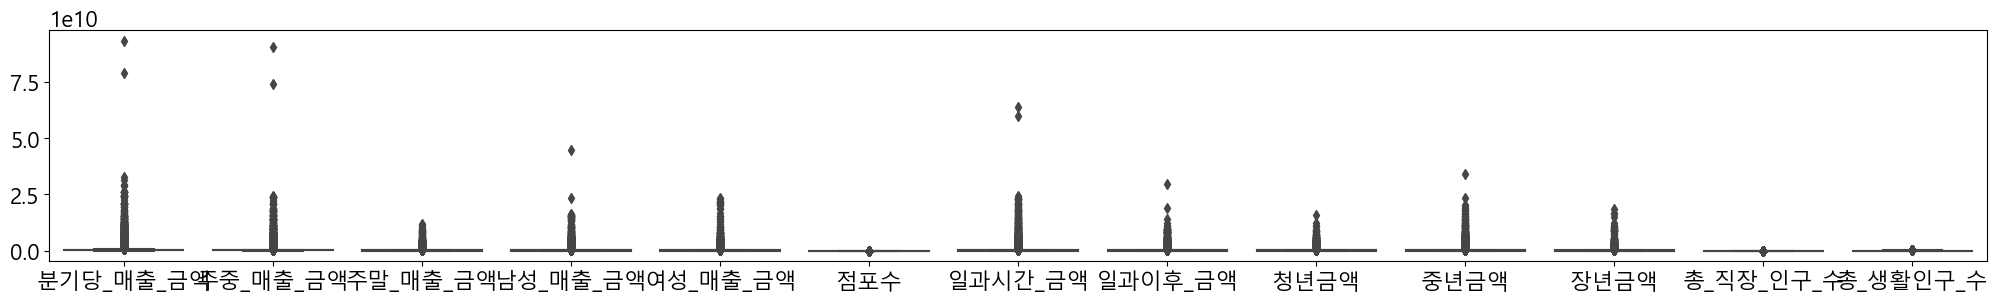

In [17]:
plt.figure(figsize=(25, 3))
sb.boxplot(tmp)
plt.show()
plt.close()

> ###### 무조건표준화

데이터 표준화

명목형을 제외한 연속형 변수만 추출

In [18]:
ndf = df.drop(cnames, axis=1)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265937 entries, 0 to 265936
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   분기당_매출_금액  265928 non-null  float64
 1   주중_매출_금액   265928 non-null  float64
 2   주말_매출_금액   265928 non-null  float64
 3   남성_매출_금액   265928 non-null  float64
 4   여성_매출_금액   265928 non-null  float64
 5   점포수        265928 non-null  float64
 6   일과시간_금액    265928 non-null  float64
 7   일과이후_금액    265928 non-null  float64
 8   청년금액       265928 non-null  float64
 9   중년금액       265928 non-null  float64
 10  장년금액       265928 non-null  float64
 11  엑스좌표_값     265928 non-null  float64
 12  와이좌표_값     265928 non-null  float64
 13  총_직장_인구_수  265937 non-null  int64  
 14  총_생활인구_수   222132 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 30.4 MB


데이터 표준화

In [19]:
std_ndf = helper.scalling(ndf)
std_ndf.head()

,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,일과시간_금액,일과이후_금액,청년금액,중년금액,장년금액,엑스좌표_값,와이좌표_값,총_직장_인구_수,총_생활인구_수
0,-0.093174,-0.012790,-0.321266,-0.112799,-0.063258,0.052296,-0.141795,0.012877,-0.309039,0.133257,-0.224244,0.668358,0.491995,-0.394192,-1.261139
1,-0.341783,-0.319948,-0.319350,-0.341485,-0.310236,-0.416959,-0.270780,-0.359295,-0.356415,-0.296167,-0.224244,0.668358,0.491995,-0.394192,-1.261139
2,-0.227556,-0.191080,-0.281653,-0.233631,-0.174450,-0.573378,-0.181047,-0.237971,-0.280741,-0.110260,-0.224244,0.668358,0.491995,-0.394192,-1.261139
3,-0.216867,-0.221583,-0.144200,-0.212989,-0.211614,-0.573378,-0.238861,-0.118672,-0.166785,-0.209664,-0.197412,0.668358,0.491995,-0.394192,-1.261139
4,2.016991,2.008761,1.505045,1.037640,0.287276,-0.573378,2.199311,1.139970,0.262938,0.746152,0.848232,0.668358,0.491995,-0.394192,-1.261139


표준화 결과에 대한 상자그림

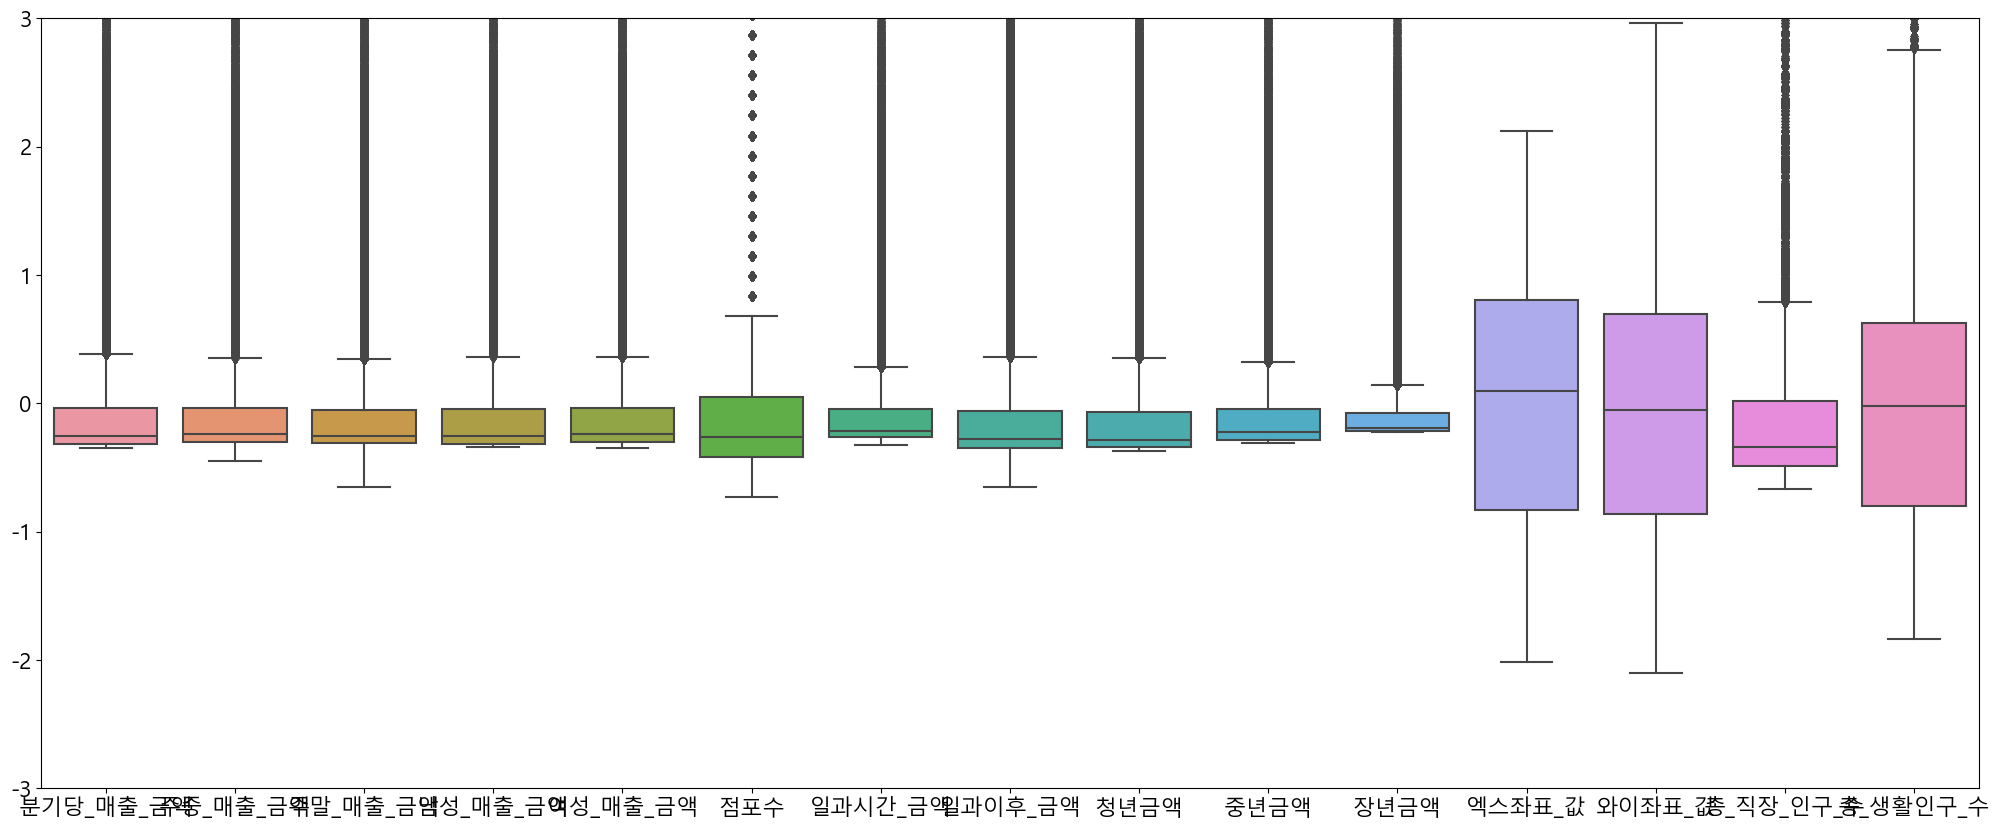

In [20]:
plt.figure(figsize=(25, 10))
sb.boxplot(std_ndf)
plt.ylim(-3,3)
plt.show()
plt.close()

> ###### 데이터 분포가 비슷해졌으므로 학습모델 구성에 활용해도 좋다고 판단

#### #04. 최종 데이터 프레임 구성

연속형과 명목형 데이터 결합

In [23]:
fdf = merge(std_ndf, cdf, left_index=True, right_index=True)
fdf.dropna(inplace=True)
fdf.to_excel("fdf.xlsx", index=False)
fdf

,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,일과시간_금액,일과이후_금액,청년금액,중년금액,...,기준_년_코드,기준_분기_코드,Covid19,상권_코드,상권_코드_명,시군구_코드,행정동_코드,시군구명,시군구코드,도심
0,-0.093174,-0.012790,-0.321266,-0.112799,-0.063258,0.052296,-0.141795,0.012877,-0.309039,0.133257,...,2018,3,0.0,1000094,마장로39길,11200.0,11200540.0,성동구,11200.0,0.0
1,-0.341783,-0.319948,-0.319350,-0.341485,-0.310236,-0.416959,-0.270780,-0.359295,-0.356415,-0.296167,...,2018,3,0.0,1000094,마장로39길,11200.0,11200540.0,성동구,11200.0,0.0
2,-0.227556,-0.191080,-0.281653,-0.233631,-0.174450,-0.573378,-0.181047,-0.237971,-0.280741,-0.110260,...,2018,3,0.0,1000094,마장로39길,11200.0,11200540.0,성동구,11200.0,0.0
3,-0.216867,-0.221583,-0.144200,-0.212989,-0.211614,-0.573378,-0.238861,-0.118672,-0.166785,-0.209664,...,2018,3,0.0,1000094,마장로39길,11200.0,11200540.0,성동구,11200.0,0.0
4,2.016991,2.008761,1.505045,1.037640,0.287276,-0.573378,2.199311,1.139970,0.262938,0.746152,...,2018,3,0.0,1000094,마장로39길,11200.0,11200540.0,성동구,11200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265923,-0.308943,-0.298614,-0.259065,-0.278982,-0.310504,0.052296,-0.248920,-0.317995,-0.320954,-0.267027,...,2021,1,1.0,1000651,우마길,11530.0,11530595.0,구로구,11530.0,0.0
265924,-0.337817,-0.321128,-0.300248,-0.328487,-0.315769,0.208714,-0.264765,-0.359809,-0.350591,-0.294273,...,2021,1,1.0,1000651,우마길,11530.0,11530595.0,구로구,11530.0,0.0
265925,-0.325138,-0.310539,-0.284376,-0.297178,-0.324480,-0.260541,-0.269061,-0.323102,-0.338715,-0.289251,...,2021,1,1.0,1000651,우마길,11530.0,11530595.0,구로구,11530.0,0.0
265926,-0.252727,-0.264051,-0.149703,-0.223150,-0.242305,0.052296,-0.209023,-0.251332,-0.257141,-0.179114,...,2021,1,1.0,1000651,우마길,11530.0,11530595.0,구로구,11530.0,0.0


#### #05.구 단위 코로나 전후 매출액 비교

In [24]:
tmp = df.filter(['시군구명', 'Covid19', '분기당_매출_금액']).groupby(['시군구명', 'Covid19'], as_index=False).mean()
tmp

,시군구명,Covid19,분기당_매출_금액
0,강남구,0.0,3.777450e+08
1,강남구,1.0,4.067136e+08
2,강동구,0.0,2.207858e+08
3,강동구,1.0,2.341338e+08
4,강북구,0.0,1.810091e+08
5,강북구,1.0,1.767230e+08
6,강서구,0.0,2.114053e+08
7,강서구,1.0,2.244594e+08
8,관악구,0.0,2.043014e+08
9,관악구,1.0,2.015775e+08


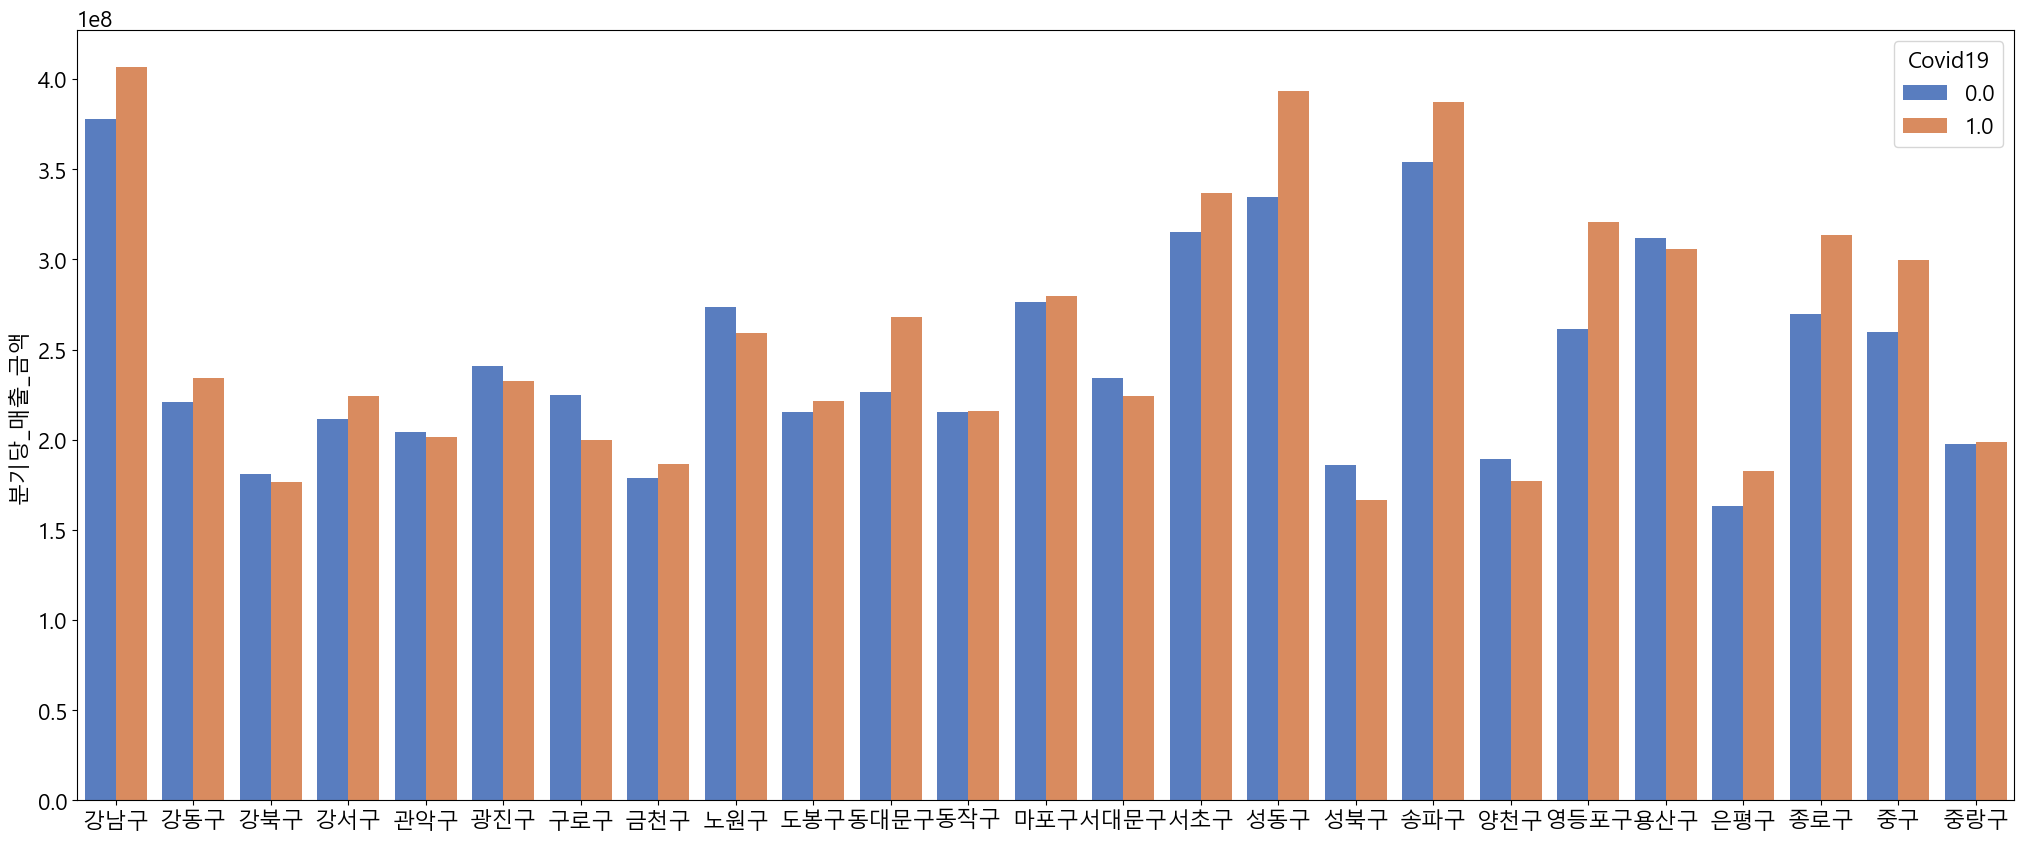

In [25]:
plt.figure(figsize=(25, 10))
sb.barplot(data=tmp, x='시군구명', y='분기당_매출_금액', hue='Covid19', palette='muted')
plt.xlabel(None)
plt.savefig('구단위_매출평균_비교.png', dpi=200, pad_inches=0)
plt.show()
plt.close()